# import libraries

In [243]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

### View Basic Information of Dataset

In [244]:
# Load the dataset 
df = pd.read_csv('../data/raw/Ovarian_patient_data.csv')

In [245]:
# Display first few rows
df.head()

,Timestamp,Age,BMI,Comorbidity,Symptom,CA125,CancerStage,Histopathology,PreviousTreatment,MenstrualHistory,...,RadiomicIntensity,RadiomicShape,DopplerVelocity,Parity,OralContraceptives,HormoneTherapy,MenarcheAge,MenopauseAge,RiskLabel,ProgressionProbability
0,2019-01-01 00:00:00,67.450712,27.468755,0,0,66.738329,0,serous,0,regular,...,57.572038,1.285647,1.948916,0,0,0,12.077803,54.947593,2,0.176654
1,2019-01-01 01:00:00,57.926035,27.736019,1,0,28.390526,1,clear cell,0,regular,...,44.385558,0.656970,3.589821,0,0,0,12.745908,46.864164,0,0.343371
2,2019-01-01 02:00:00,69.715328,22.285561,0,0,118.120787,3,clear cell,1,regular,...,35.711312,1.034179,3.625658,0,0,0,12.495603,55.757130,0,0.036907
3,2019-01-01 03:00:00,82.845448,31.315519,1,1,6.418598,0,serous,1,regular,...,49.922109,1.000078,1.108221,0,0,0,12.577276,50.462495,1,0.161943
4,2019-01-01 04:00:00,56.487699,17.056296,1,0,65.912779,1,mucinous,0,regular,...,43.547336,1.415819,1.030482,2,0,0,14.698884,58.628299,0,0.554210


In [246]:
# printing the columnas of dataset and length of dataset 
df.columns

Index(['Timestamp', 'Age', 'BMI', 'Comorbidity', 'Symptom', 'CA125',
       'CancerStage', 'Histopathology', 'PreviousTreatment',
       'MenstrualHistory', 'Ethnicity', 'Smoking', 'Alcohol', 'Residence',
       'SocioeconomicStatus', 'BRCA_Mutation', 'GeneExpression', 'SNP_Status',
       'DNAMethylation', 'miRNA', 'TumorSize', 'TumorLocation',
       'EnhancementPattern', 'RadiomicTexture', 'RadiomicIntensity',
       'RadiomicShape', 'DopplerVelocity', 'Parity', 'OralContraceptives',
       'HormoneTherapy', 'MenarcheAge', 'MenopauseAge', 'RiskLabel',
       'ProgressionProbability'],
      dtype='object')

In [247]:
# Check dataset dimensions
print(f"Dataset shape: {df.shape}")

Dataset shape: (200100, 34)


In [248]:
# Display column names and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200100 entries, 0 to 200099
Data columns (total 34 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Timestamp               200100 non-null  object 
 1   Age                     200100 non-null  float64
 2   BMI                     200100 non-null  float64
 3   Comorbidity             200100 non-null  int64  
 4   Symptom                 200100 non-null  int64  
 5   CA125                   200100 non-null  float64
 6   CancerStage             200100 non-null  int64  
 7   Histopathology          200100 non-null  object 
 8   PreviousTreatment       200100 non-null  int64  
 9   MenstrualHistory        200100 non-null  object 
 10  Ethnicity               200100 non-null  object 
 11  Smoking                 200100 non-null  int64  
 12  Alcohol                 200100 non-null  int64  
 13  Residence               200100 non-null  object 
 14  SocioeconomicStatus 

In [249]:
# Summary statistics for numerical columns
df.describe()

,Age,BMI,Comorbidity,Symptom,CA125,CancerStage,PreviousTreatment,Smoking,Alcohol,BRCA_Mutation,...,RadiomicIntensity,RadiomicShape,DopplerVelocity,Parity,OralContraceptives,HormoneTherapy,MenarcheAge,MenopauseAge,RiskLabel,ProgressionProbability
count,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000,...,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000,200100.000000
mean,59.901575,28.003226,0.300000,0.402384,34.874555,0.996067,0.199530,0.199825,0.250855,0.150025,...,50.030013,0.999722,2.496380,0.653193,0.199940,0.148931,13.014028,50.006837,0.650440,0.285436
std,14.668235,4.980700,0.458259,0.490380,34.411115,1.223703,0.399648,0.399870,0.433506,0.357097,...,9.993355,0.275003,1.443022,0.911912,0.399956,0.356021,1.468198,4.783299,0.909397,0.160168
min,18.000000,15.000000,0.000000,0.000000,0.000018,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.215829,0.500000,0.000007,0.000000,0.000000,0.000000,10.000000,40.000000,0.000000,0.000647
25%,49.891372,24.616558,0.000000,0.000000,10.057735,0.000000,0.000000,0.000000,0.000000,0.000000,...,43.288079,0.796569,1.243463,0.000000,0.000000,0.000000,11.988691,46.674184,0.000000,0.160298
50%,60.025998,27.998428,0.000000,0.000000,24.162441,0.000000,0.000000,0.000000,0.000000,0.000000,...,50.004486,1.000032,2.500433,0.000000,0.000000,0.000000,12.999088,50.006139,0.000000,0.264014
75%,70.141600,31.361152,1.000000,1.000000,48.421526,2.000000,0.000000,0.000000,1.000000,0.000000,...,56.784981,1.202314,3.743309,1.000000,0.000000,0.000000,14.013925,53.357075,1.000000,0.389292
max,90.000000,49.096832,1.000000,1.000000,200.000000,4.000000,1.000000,1.000000,1.000000,1.000000,...,99.203153,1.500000,4.999994,3.000000,1.000000,1.000000,18.000000,60.000000,3.000000,0.950690


In [250]:
# Summary statistics for categorical columns
df.describe(include=['object'])

,Timestamp,Histopathology,MenstrualHistory,Ethnicity,Residence,SocioeconomicStatus,TumorLocation
count,200100,200100,200100,200100,200100,200100,200100
unique,200100,3,2,4,2,3,3
top,2019-01-01 00:00:00,serous,regular,Caucasian,Urban,Middle,Ovary
freq,1,140444,140157,119814,140325,100425,160263


# Data cleaning 

In [251]:
# convert the categorical features into number or label features 

categorical_cols = df.select_dtypes(include="object")
numeric_cols = df.select_dtypes(include='number')

# print the categorical and numeric columns and its shape 
print('categorical_cols',categorical_cols.columns)
print('numeric_cols',numeric_cols.columns)
print(categorical_cols.shape,numeric_cols.shape,df.shape)




categorical_cols Index(['Timestamp', 'Histopathology', 'MenstrualHistory', 'Ethnicity',
       'Residence', 'SocioeconomicStatus', 'TumorLocation'],
      dtype='object')
numeric_cols Index(['Age', 'BMI', 'Comorbidity', 'Symptom', 'CA125', 'CancerStage',
       'PreviousTreatment', 'Smoking', 'Alcohol', 'BRCA_Mutation',
       'GeneExpression', 'SNP_Status', 'DNAMethylation', 'miRNA', 'TumorSize',
       'EnhancementPattern', 'RadiomicTexture', 'RadiomicIntensity',
       'RadiomicShape', 'DopplerVelocity', 'Parity', 'OralContraceptives',
       'HormoneTherapy', 'MenarcheAge', 'MenopauseAge', 'RiskLabel',
       'ProgressionProbability'],
      dtype='object')
(200100, 7) (200100, 27) (200100, 34)


In [252]:
# print the categorical columns and its values 
categorical_cols


,Timestamp,Histopathology,MenstrualHistory,Ethnicity,Residence,SocioeconomicStatus,TumorLocation
0,2019-01-01 00:00:00,serous,regular,Hispanic,Urban,Middle,Ovary
1,2019-01-01 01:00:00,clear cell,regular,Caucasian,Urban,Low,Ovary
2,2019-01-01 02:00:00,clear cell,regular,African,Urban,Low,Ovary
3,2019-01-01 03:00:00,serous,regular,African,Urban,Middle,Ovary
4,2019-01-01 04:00:00,mucinous,regular,Caucasian,Rural,Middle,Ovary
...,...,...,...,...,...,...,...
200095,2041-10-29 07:00:00,serous,regular,Caucasian,Rural,Middle,Ovary
200096,2041-10-29 08:00:00,serous,irregular,Hispanic,Rural,Middle,Ovary
200097,2041-10-29 09:00:00,serous,regular,African,Urban,High,Ovary
200098,2041-10-29 10:00:00,serous,regular,Asian,Rural,Low,Peritoneum


In [253]:
# print the mumeric columns and its values 
numeric_cols

,Age,BMI,Comorbidity,Symptom,CA125,CancerStage,PreviousTreatment,Smoking,Alcohol,BRCA_Mutation,...,RadiomicIntensity,RadiomicShape,DopplerVelocity,Parity,OralContraceptives,HormoneTherapy,MenarcheAge,MenopauseAge,RiskLabel,ProgressionProbability
0,67.450712,27.468755,0,0,66.738329,0,0,0,0,1,...,57.572038,1.285647,1.948916,0,0,0,12.077803,54.947593,2,0.176654
1,57.926035,27.736019,1,0,28.390526,1,0,0,0,0,...,44.385558,0.656970,3.589821,0,0,0,12.745908,46.864164,0,0.343371
2,69.715328,22.285561,0,0,118.120787,3,1,0,0,0,...,35.711312,1.034179,3.625658,0,0,0,12.495603,55.757130,0,0.036907
3,82.845448,31.315519,1,1,6.418598,0,1,0,0,0,...,49.922109,1.000078,1.108221,0,0,0,12.577276,50.462495,1,0.161943
4,56.487699,17.056296,1,0,65.912779,1,0,0,1,0,...,43.547336,1.415819,1.030482,2,0,0,14.698884,58.628299,0,0.554210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200095,56.482842,37.250369,1,1,10.963560,3,0,0,0,0,...,52.644672,0.500000,3.499102,0,0,0,12.593397,53.628508,2,0.179641
200096,45.268634,16.790468,0,0,66.198115,0,0,0,0,0,...,46.996590,1.009867,2.807436,1,0,0,13.653758,52.514075,3,0.312034
200097,77.853943,21.333605,0,0,41.621119,2,0,0,0,0,...,50.529664,0.829427,4.394963,0,0,0,10.527138,60.000000,2,0.043449
200098,71.047060,31.607421,1,0,59.717572,0,0,0,0,0,...,48.182645,0.989097,2.777310,0,0,0,13.053107,51.423338,0,0.223509


### STEP 1: remove unecessery columns from dataset 

In [254]:
# First we are removing "Timestamp" columns from our dataset it does not impect on our data
df = df.drop(columns=['Timestamp'])



### STEP 2: Drop the duplicate rows form the dataset 

In [255]:
# now we are droping the dupliucate values from dataset to prevent the skewing in data

'''
print the number of duplicat values present in our dataset if it is present then we will drop duplicate rows 
'''
duplicates = df.duplicated().sum()
print('Number of duplicate rows: ',duplicates)
if duplicates != 0:
    df = df.drop_duplicates()
    print('duplicat records droped')


Number of duplicate rows:  0


### STEP 4: Standardize categorical values:

In [256]:
''' we are converting all categorical values into lower case and remove all unecessery speces '''

standardize_columns = ['Histopathology','Ethnicity','MenstrualHistory','TumorLocation','Residence','SocioeconomicStatus']
df['Histopathology'] = df['Histopathology'].str.lower().str.strip()
df['Ethnicity'] = df['Ethnicity'].str.lower().str.strip()
df['MenstrualHistory'] = df['MenstrualHistory'].str.lower().str.strip()
df['TumorLocation'] = df['TumorLocation'].str.lower().str.strip()
df['Residence'] = df['Residence'].str.lower().str.strip()
df['SocioeconomicStatus'] = df['SocioeconomicStatus'].str.lower().str.strip()

## STEP 5: Converting categorical data into number 

In [257]:
'''for converting categorical columns into number we are using LabelEncoder '''
cat_columns = ['Histopathology','MenstrualHistory','Ethnicity','Residence','SocioeconomicStatus','TumorLocation']
label_encoder = LabelEncoder()

for column in cat_columns:
    df[column] = label_encoder.fit_transform(df[column])


# now converting binary values into bool type and labeled values into int8 type for memory-efficency
binary_cols = ['OralContraceptives','HormoneTherapy','PreviousTreatment',
               'Symptom','MenstrualHistory','Smoking','Alcohol','Residence',
               'BRCA_Mutation','SNP_Status','Comorbidity']
for column in binary_cols:
    df[column] = df[column].astype(bool)


labeled_col = ['RiskLabel','Parity','CancerStage','Histopathology','SocioeconomicStatus',
               'TumorLocation','Ethnicity']
for column in labeled_col:
    df[column] = df[column].astype('int8')


number_cols = ['Age','BMI','CA125','GeneExpression','DNAMethylation','miRNA','TumorSize',
               'EnhancementPattern','RadiomicTexture','RadiomicIntensity','RadiomicShape',
               'DopplerVelocity','MenarcheAge','MenopauseAge','ProgressionProbability']


print(df['Residence'].value_counts(normalize=True))


df.columns

Residence
True     0.701274
False    0.298726
Name: proportion, dtype: float64


Index(['Age', 'BMI', 'Comorbidity', 'Symptom', 'CA125', 'CancerStage',
       'Histopathology', 'PreviousTreatment', 'MenstrualHistory', 'Ethnicity',
       'Smoking', 'Alcohol', 'Residence', 'SocioeconomicStatus',
       'BRCA_Mutation', 'GeneExpression', 'SNP_Status', 'DNAMethylation',
       'miRNA', 'TumorSize', 'TumorLocation', 'EnhancementPattern',
       'RadiomicTexture', 'RadiomicIntensity', 'RadiomicShape',
       'DopplerVelocity', 'Parity', 'OralContraceptives', 'HormoneTherapy',
       'MenarcheAge', 'MenopauseAge', 'RiskLabel', 'ProgressionProbability'],
      dtype='object')

### STEP 6: Fill the missing values

In [258]:
'''We are felling missing value with median value'''

nan_count = df.isnull().sum().sum()
print('NaN values in dataset: ',nan_count)
if  nan_count != 0:
    df = df.fillna(value=np.median())
    print('Nan values filled with median')

NaN values in dataset:  0


### STEP 7: Normalize numerical feature 

In [259]:
scaler = MinMaxScaler()
df[number_cols] = scaler.fit_transform(df[number_cols])
print(df)

             Age       BMI  Comorbidity  Symptom     CA125  CancerStage  \
0       0.686815  0.365687        False    False  0.333692            0   
1       0.554528  0.373525         True    False  0.141953            1   
2       0.718268  0.213673        False    False  0.590604            3   
3       0.900631  0.478505         True     True  0.032093            0   
4       0.534551  0.060308         True    False  0.329564            1   
...          ...       ...          ...      ...       ...          ...   
200095  0.534484  0.652564         True     True  0.054818            3   
200096  0.378731  0.052511        False    False  0.330991            0   
200097  0.831305  0.185753        False    False  0.208106            2   
200098  0.736765  0.487066         True    False  0.298588            0   
200099  1.000000  0.448493        False    False  0.154782            1   

        Histopathology  PreviousTreatment  MenstrualHistory  Ethnicity  ...  \
0                   

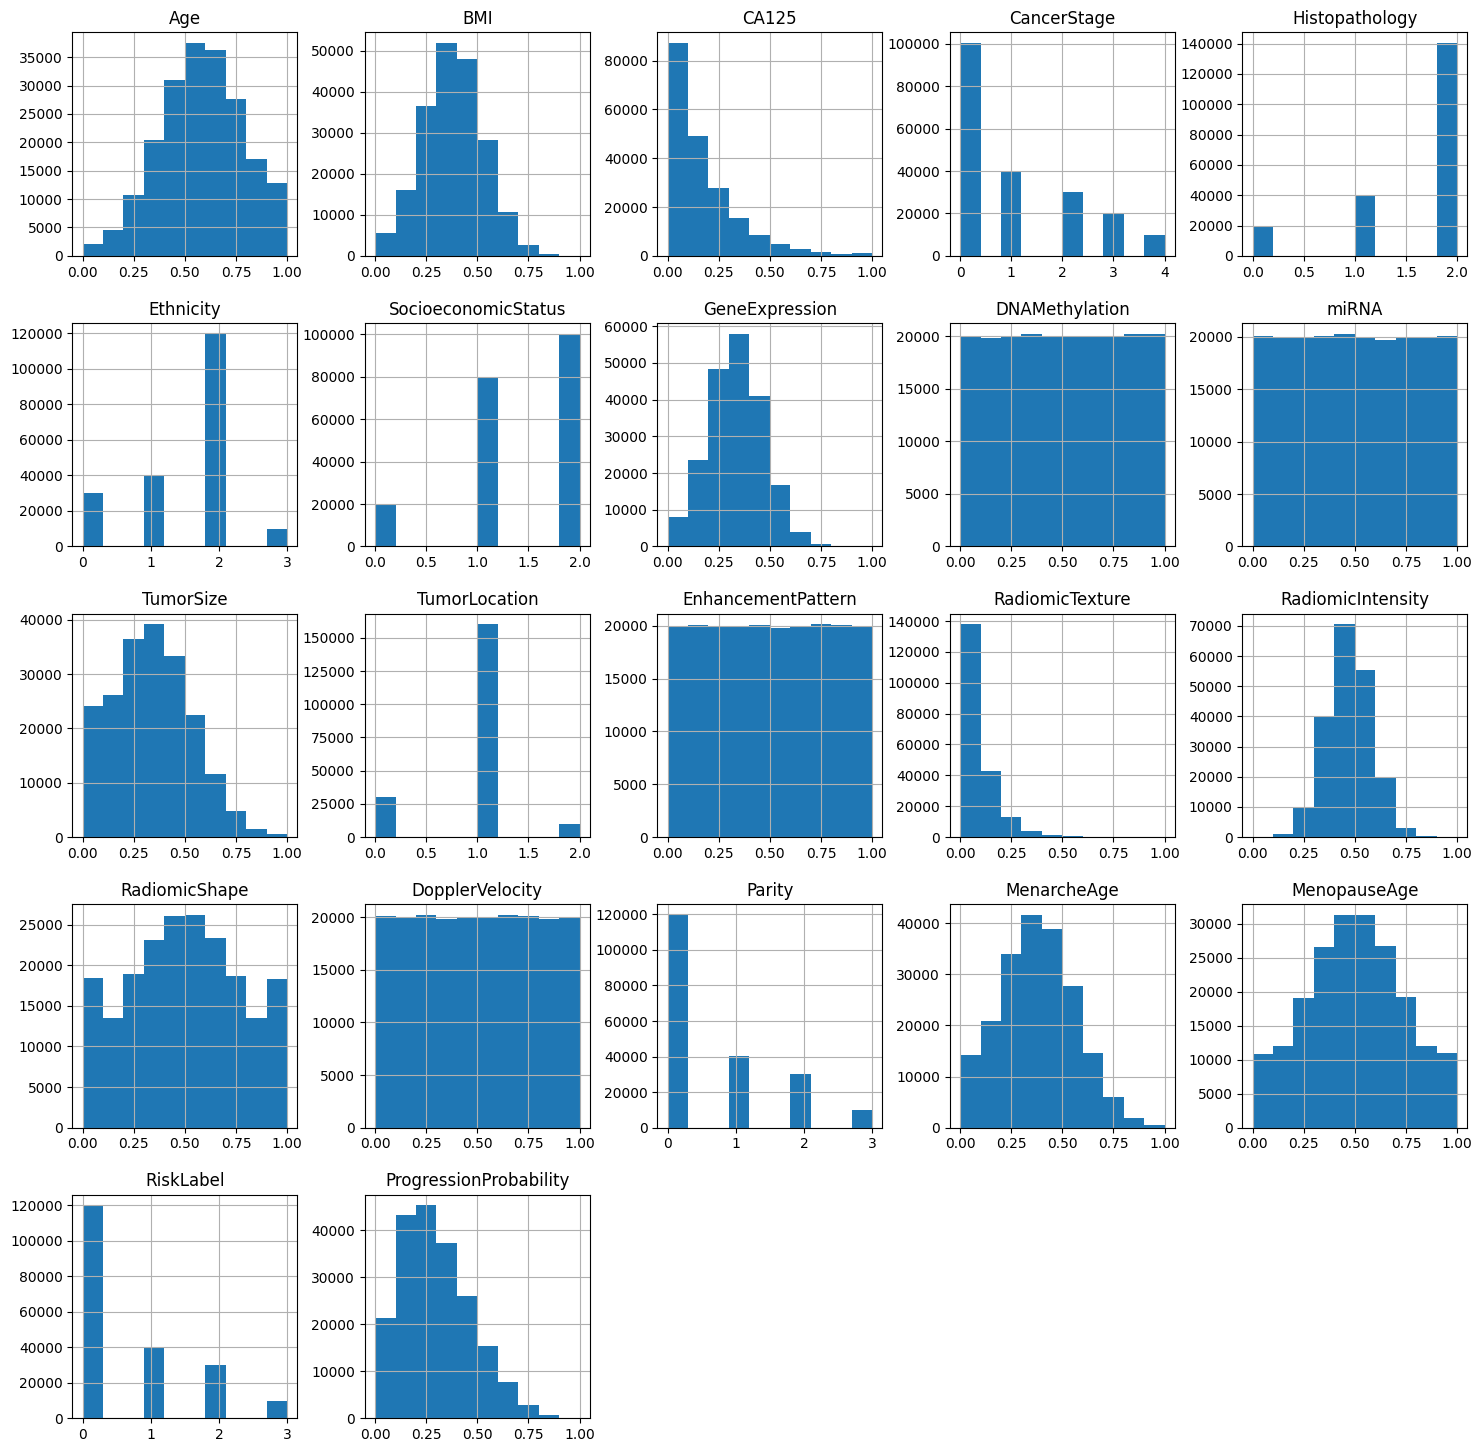

In [260]:
df.hist(figsize=(18,18))
plt.show()